In [1]:




from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
import keras
from data_loader.cat_dog_loader import catdogloader


from keras import backend as K
# set GPU memory 
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session

    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)


def create_model(input_shape, n_out):
    
    pretrain_model = InceptionV3(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)
    
    model = Sequential()
    model.add(pretrain_model)
    model.add(Flatten())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_out))
    model.add(Activation('sigmoid'))
    return model

Using TensorFlow backend.


In [6]:
!ls ../kaggle_dogcat/train

cats  dogs


In [4]:
import os

cats = os.listdir('train/cats')
dogs = os.listdir('train/dogs')

In [8]:
len(dogs+cats)

4000

In [9]:
os.path.join('train','dogs',dogs[0])

'train/dogs/dog.10001.jpg'

In [2]:
data = catdogloader()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
import numpy as np
ShapeList = []
for i in data.X_data:
    ShapeList.append(np.shape(i))

In [6]:
ShapeList = np.array(ShapeList)

In [3]:
ShapeList.shape

NameError: name 'ShapeList' is not defined

In [8]:
print(np.max(ShapeList,axis=0))
print(np.min(ShapeList,axis=0))

[256 256   3]
[256 256   3]


In [3]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
# 构建不带分类器的预训练模型
base_model = InceptionV3(weights='imagenet', include_top=False)

# 添加全局平均池化层
x = base_model.output
x = GlobalAveragePooling2D()(x)

# 添加一个全连接层
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# 添加一个分类器，假设我们有200个类
predictions = Dense(2, activation='softmax')(x)

# 构建我们需要训练的完整模型
model = Model(inputs=base_model.input, outputs=predictions)

W0818 15:53:49.498804 139730679297856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 15:53:49.499850 139730679297856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 15:53:49.502167 139730679297856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 15:53:49.515127 139730679297856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 15:53:49.515656 1397306792

In [4]:
for layer in base_model.layers:
    layer.trainable = True

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

W0818 15:54:09.738683 139730679297856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [9]:
#data.y_train.shape
#model = load_model('SimpleModel_epoches_200.h5')
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.fit(data.X_train, data.y_train, batch_size=32, epochs=100,callbacks=callbacks_list, verbose=1, validation_split=0.05)


Train on 3799 samples, validate on 200 samples
Epoch 1/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0099 - val_loss: 0.3834

Epoch 00001: loss improved from inf to 0.00994, saving model to weights-improvement-01-0.01.h5
Epoch 2/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0066 - val_loss: 0.7655

Epoch 00002: loss improved from 0.00994 to 0.00663, saving model to weights-improvement-02-0.01.h5
Epoch 3/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0157 - val_loss: 1.0811

Epoch 00003: loss did not improve from 0.00663
Epoch 4/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0150 - val_loss: 0.8805

Epoch 00004: loss did not improve from 0.00663
Epoch 5/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0064 - val_loss: 0.2503

Epoch 00005: loss improved from 0.00663 to 0.00642, saving model to weights-improvement-05-0.01.h5
Epoch 6/100
3799/3799 [==================

3799/3799 [==============================] - 11s 3ms/step - loss: 0.0192 - val_loss: 0.9881

Epoch 00052: loss did not improve from 0.00000
Epoch 53/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0139 - val_loss: 0.4449

Epoch 00053: loss did not improve from 0.00000
Epoch 54/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0065 - val_loss: 0.7494

Epoch 00054: loss did not improve from 0.00000
Epoch 55/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0077 - val_loss: 0.4295

Epoch 00055: loss did not improve from 0.00000
Epoch 56/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0096 - val_loss: 0.3299

Epoch 00056: loss did not improve from 0.00000
Epoch 57/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0039 - val_loss: 0.6849

Epoch 00057: loss did not improve from 0.00000
Epoch 58/100
3799/3799 [==============================] - 11s 3ms/step - loss: 0.0079 - val_los

KeyboardInterrupt: 

In [4]:
import numpy as np
a= np.zeros(2)

In [10]:
temp_model = load_model('weights-improvement-37-0.00.h5')
y_pred = temp_model.predict(data.X_test)

In [11]:
print(y_pred)

[[7.31623828e-09 1.00000000e+00]
 [9.70829964e-01 2.91700121e-02]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.37833056e-26]
 [1.61913682e-27 1.00000000e+00]
 [9.04790430e-16 1.00000000e+00]
 [1.00000000e+00 3.96692078e-16]
 [2.56128605e-38 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.54352530e-25]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.61064413e-24]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [4.83910227e-03 9.95160878e-01]
 [1.00000000e+00 3.95238313e-12]
 [3.46682025e-20 1.00000000e+00]
 [1.00000000e+00 3.68435742e-15]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [4.15492873e-19 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.48124094e-25 1.00000000e+00]
 [1.00000000e+00 1.80466739e-18]
 [1.00000000e+00 1.55959230e-21]
 [1.00000000e+00 2.55835735e-15]
 [1.00000000e+00 8.60639655e-19]
 [1.00000000e+00 7.99413443e-16]
 [1.000000

In [10]:
#print(y_pred)
out = y_pred[:,1]
for index, i in enumerate(out):
    if i < 0.5:
        out[index] = 0
    else:
        out[index] = 1
print(out)

[1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.

In [12]:
import matplotlib.pyplot as plt

[1. 0.]


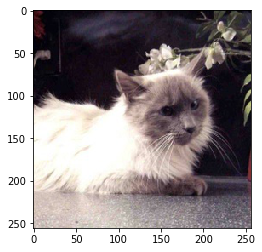

In [12]:
i = 333
print(data.y_train[i])
plt.imshow(data.X_train[i])

[1.0306554e-08 1.0000000e+00]


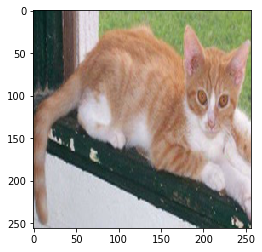

In [23]:
i = 31
print(y_pred[i])
plt.imshow(data.X_test[i])

In [12]:
import pandas as pd
import numpy as np

In [13]:
ID = [x for x in range(400)]

In [14]:

submission = pd.DataFrame({'ID':ID,'Predicted':y_pred[:,1]})

In [25]:
#submission.to_csv('size_128_0_1.csv', index=False)

In [7]:
#model.save('./SimpleModel_epoches_200.h5')

In [16]:
with open('correct_try_0818_02.csv', 'wb') as f:
    f.write(b'ID,Predicted\n')
    np.savetxt(f, submission, delimiter=',', fmt=['%d','%.12f'])